# Results Analysis

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file_path = "output.csv"
df = pandas.read_csv(file_path, encoding='utf-8')

### Results

In [6]:
columns_of_interest = ['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f',
                      'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 'Rougel r', 'Rougel p', 'Rougel f']

mean_by_strategy = df.groupby("tamperingType")[columns_of_interest].mean()
median_by_strategy = df.groupby("tamperingType")[columns_of_interest].median()
std_by_strategy = df.groupby("tamperingType")[columns_of_interest].std()

print("Mean by Tampering Strategy:\n", mean_by_strategy)
print("\nMedian by Tampering Strategy:\n", median_by_strategy)
print("\nStandard Deviation by Tampering Strategy:\n", std_by_strategy)

mean_values = df[columns_of_interest].mean()
median_values = df[columns_of_interest].median()
std_values = df[columns_of_interest].std()

print("\nOverall Mean:\n", mean_values)
print("\nOverall Median:\n", median_values)
print("\nOverall Standard Deviation:\n", std_values)

Mean by Tampering Strategy:
                                     BLEU   METEOR  Rouge1 r  Rouge1 p  \
tamperingType                                                           
Add random word                 0.618080  0.99092  0.754496  0.812006   
Duplicate Token                 0.652379  0.98558  0.812417  0.818624   
Duplicate character             0.801969  0.94152  0.935331  0.935331   
Remove Character                0.725438  0.90905  0.909806  0.886012   
Remove Token                    0.582456  0.93079  0.795783  0.740413   
Replace Character               0.753084  0.91036  0.911809  0.910584   
Replace Token with Random Word  0.626203  0.91517  0.741378  0.764074   
Swap characters                 0.766158  0.92071  0.896115  0.896115   
Swap words                      0.594409  0.97002  0.791051  0.824506   

                                Rouge1 f  Rouge2 r  Rouge2 p  Rouge2 f  \
tamperingType                                                            
Add random word    

### Plots mean and median for each metrics

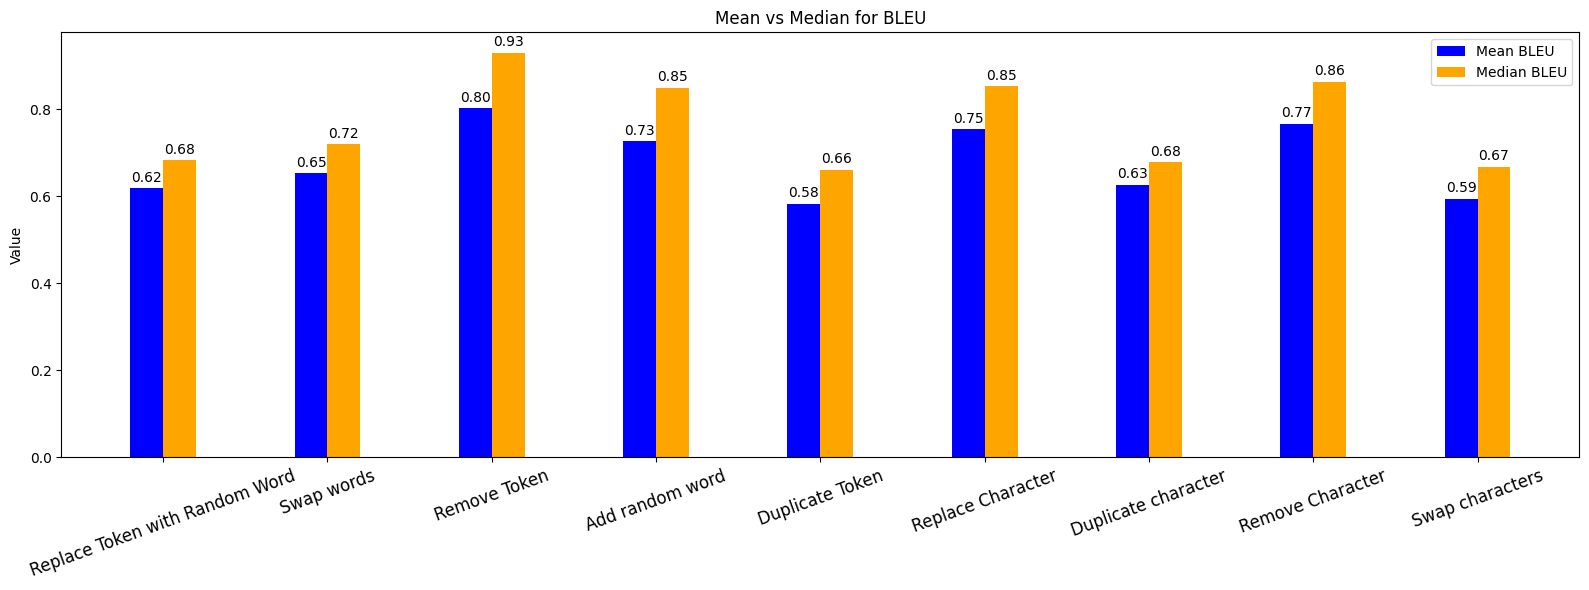

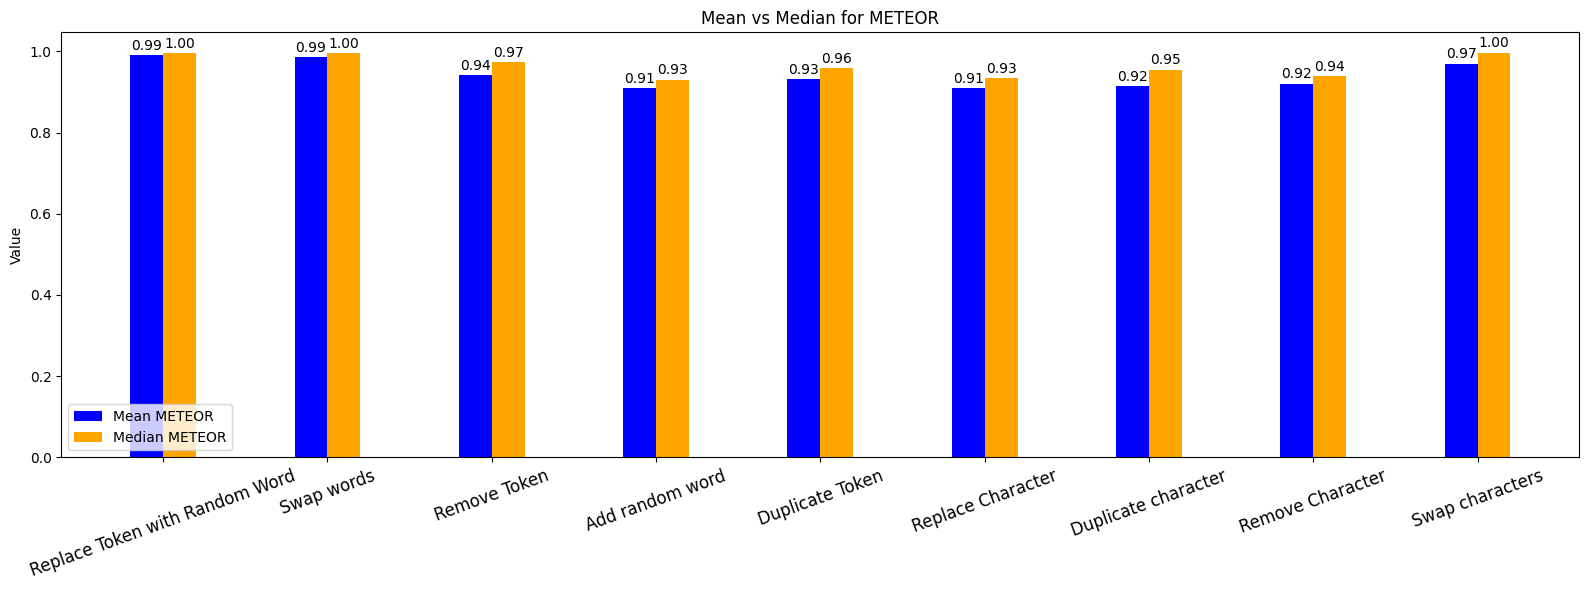

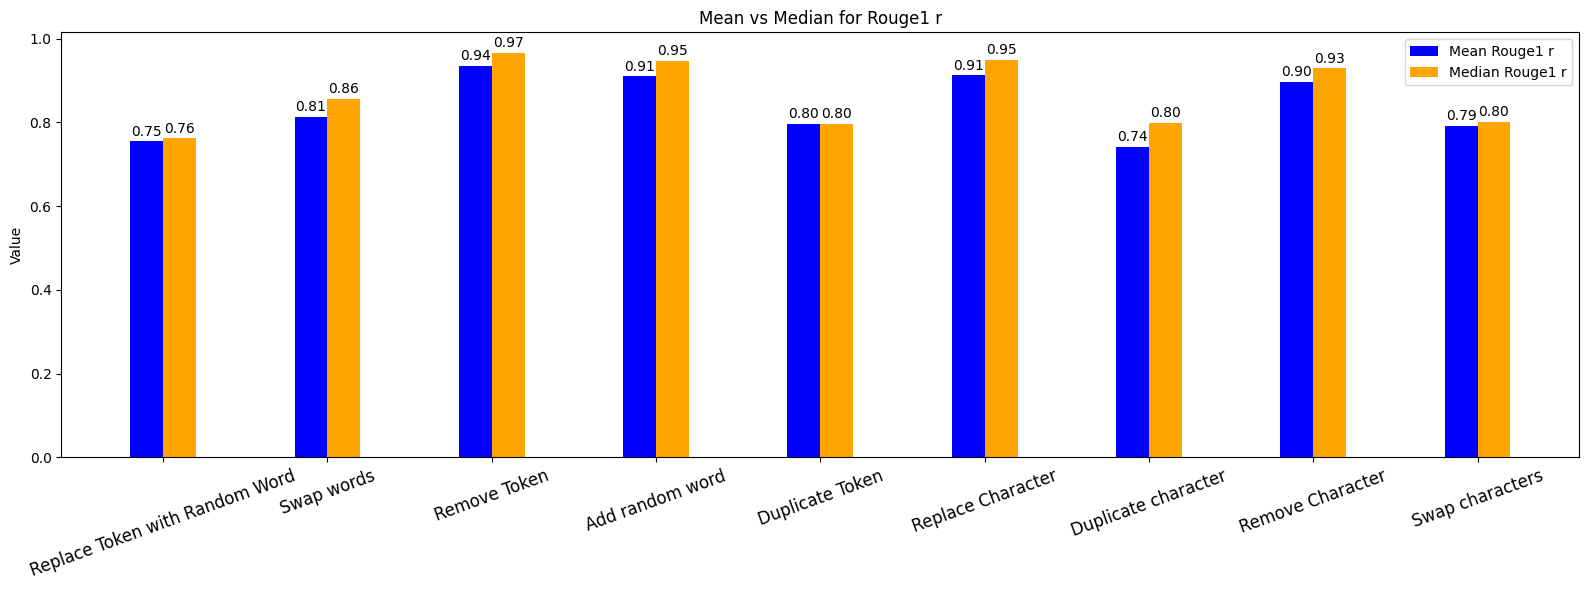

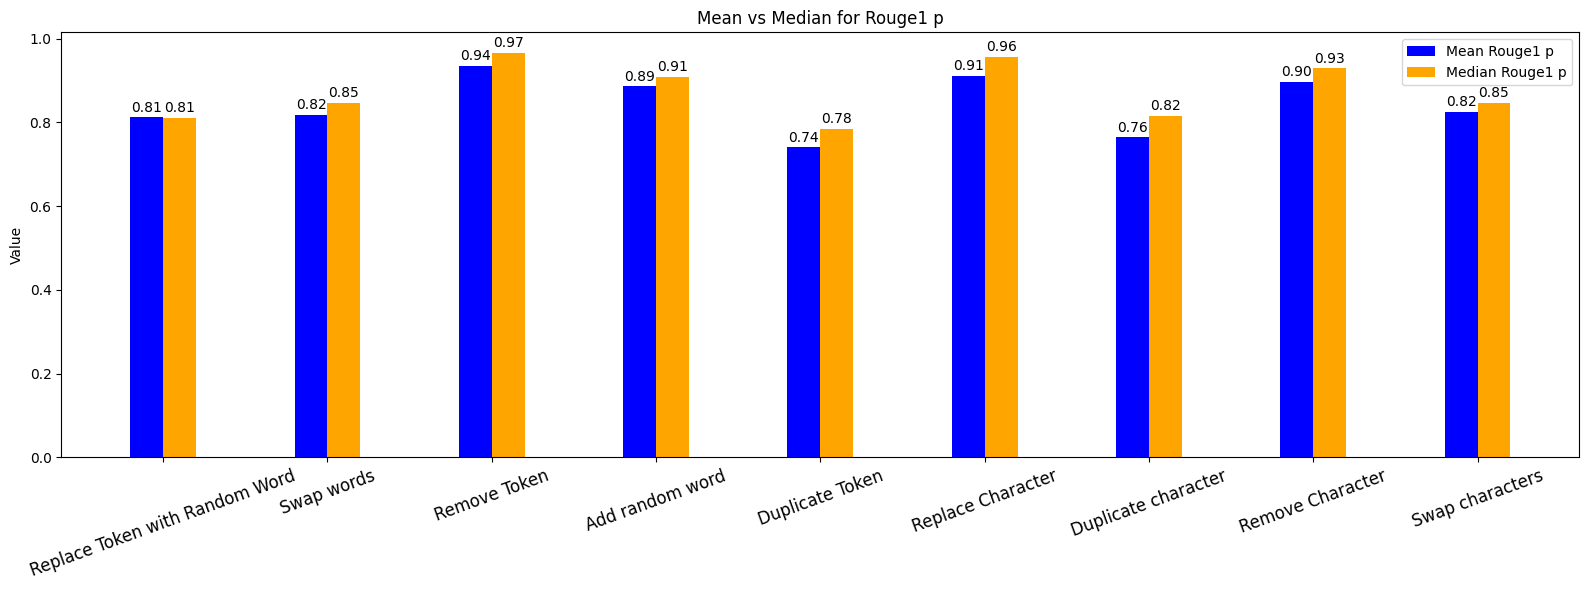

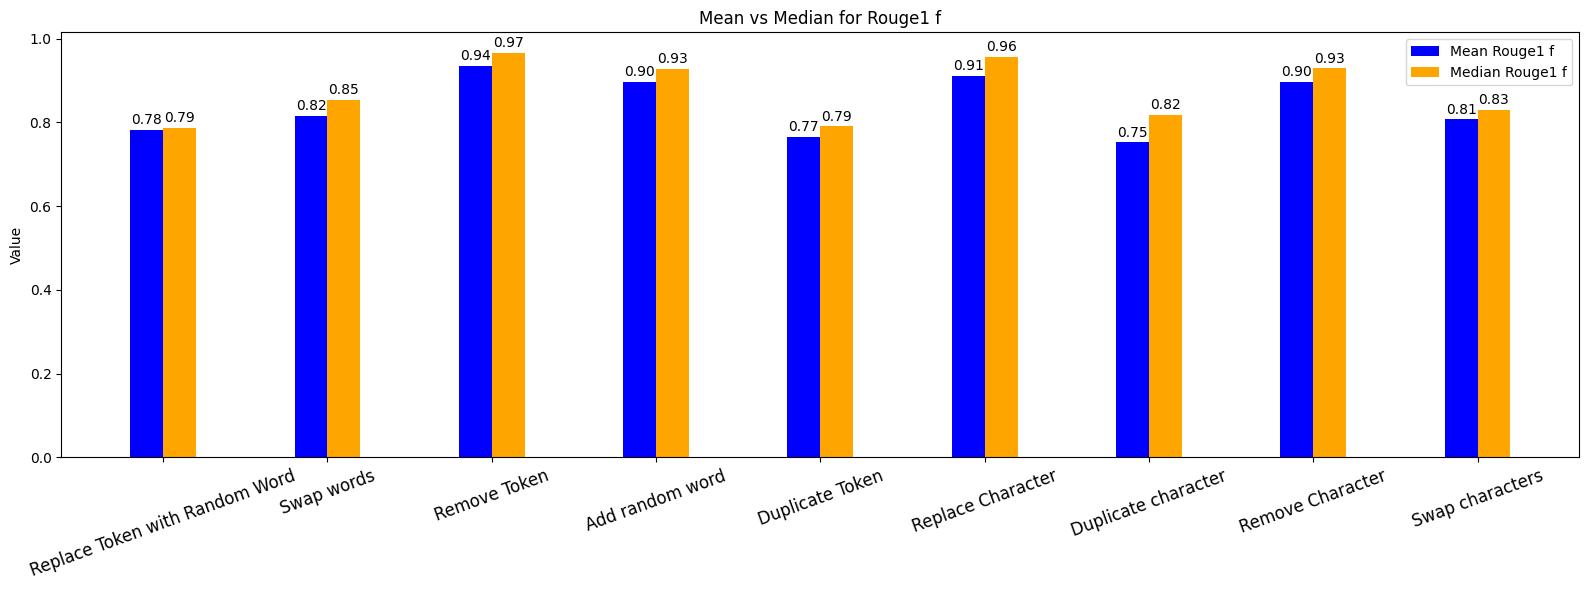

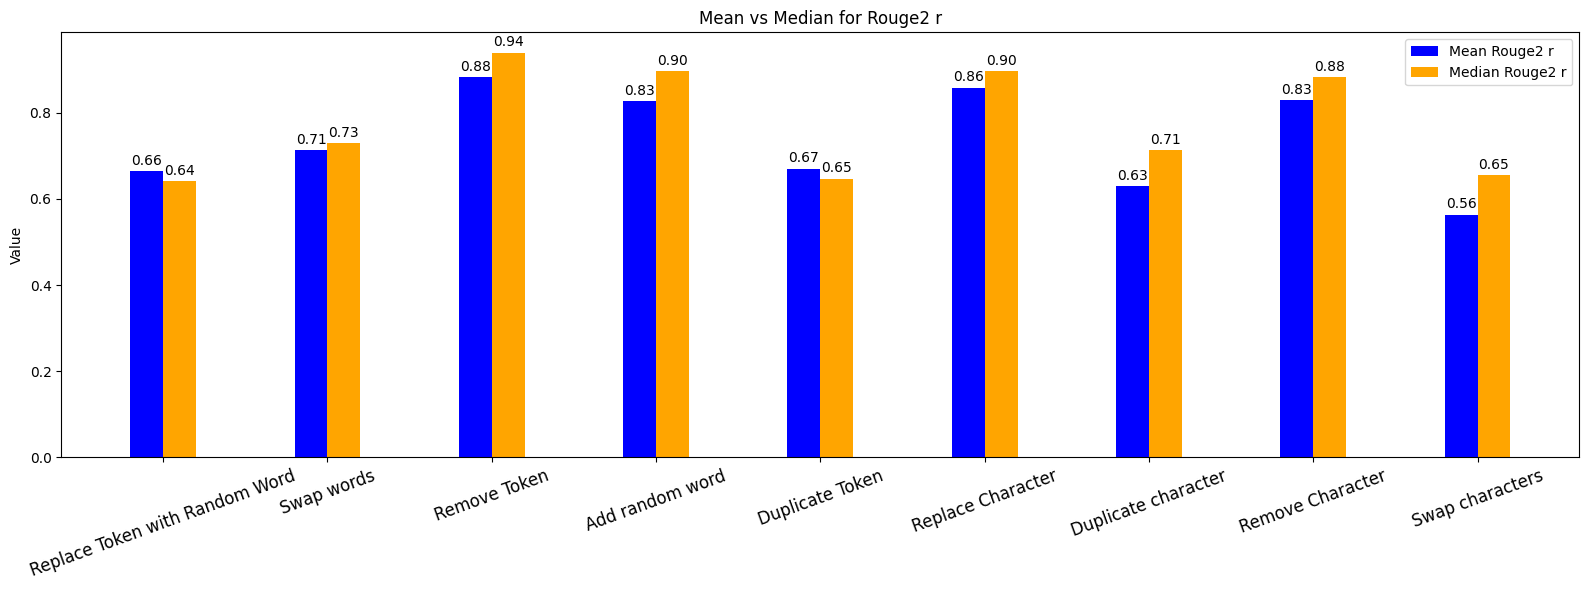

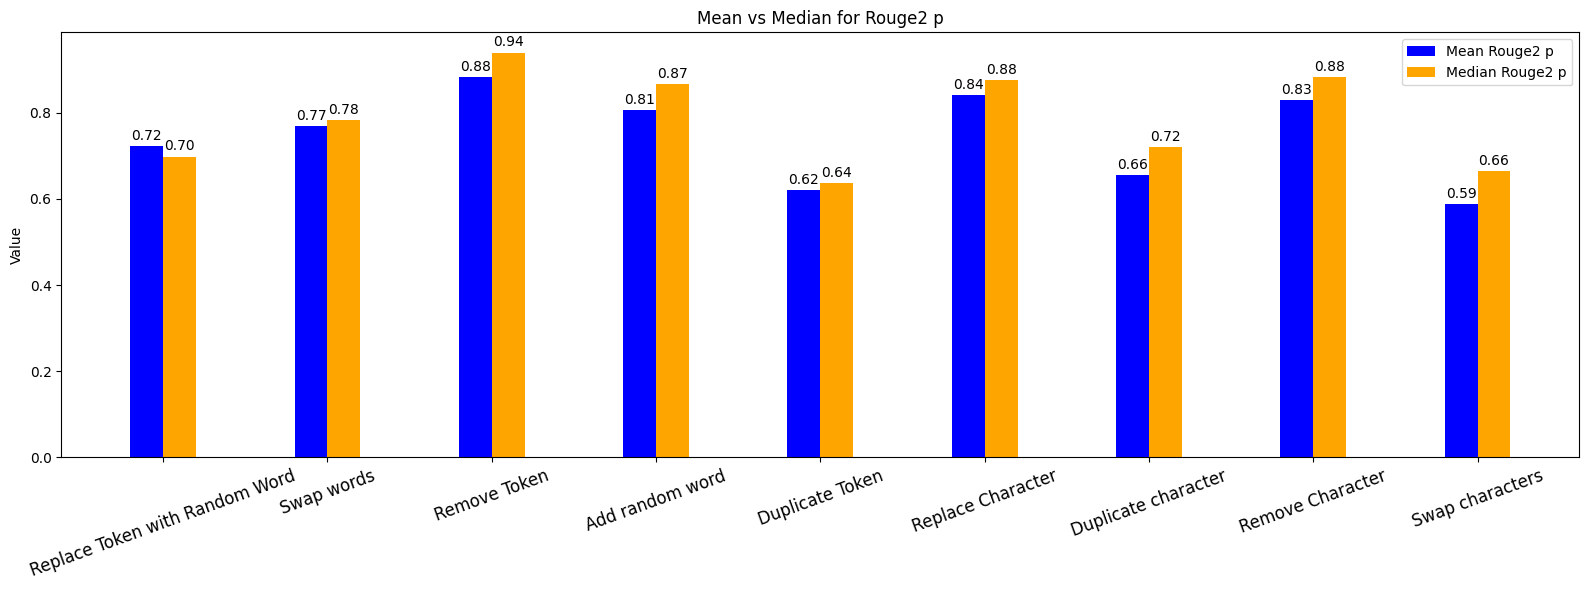

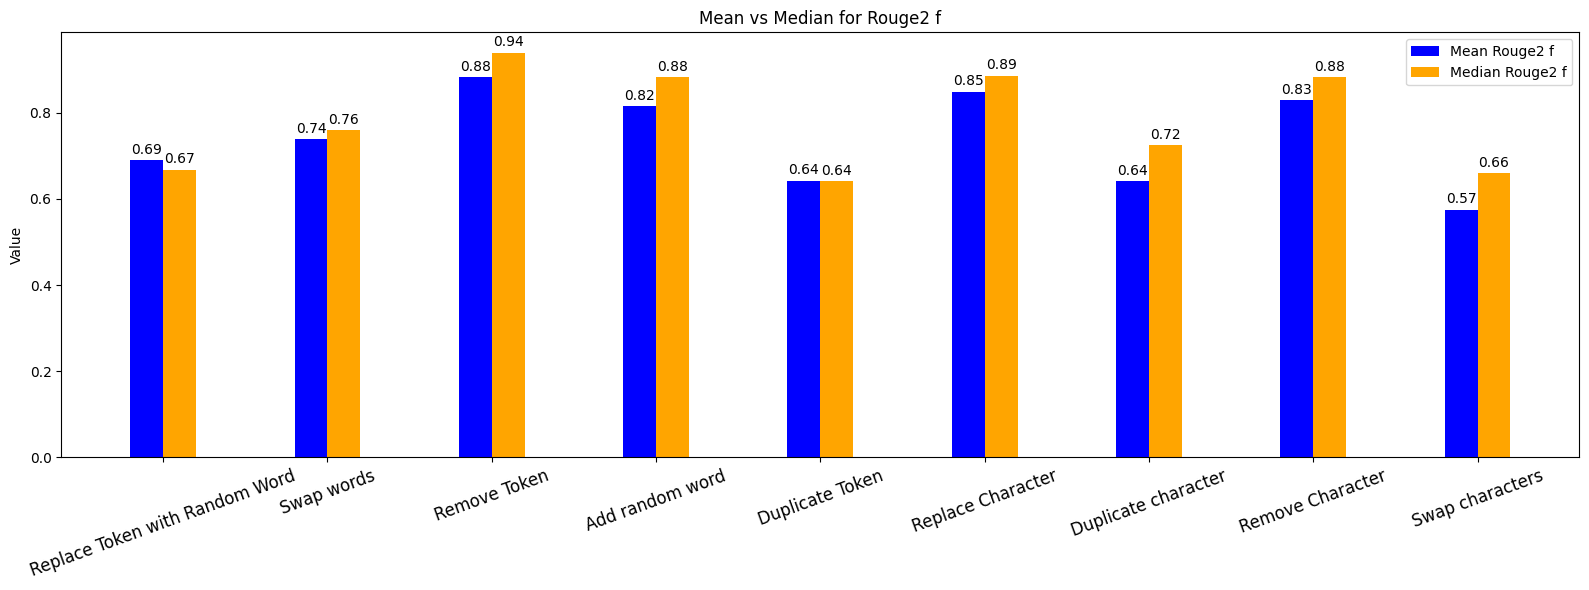

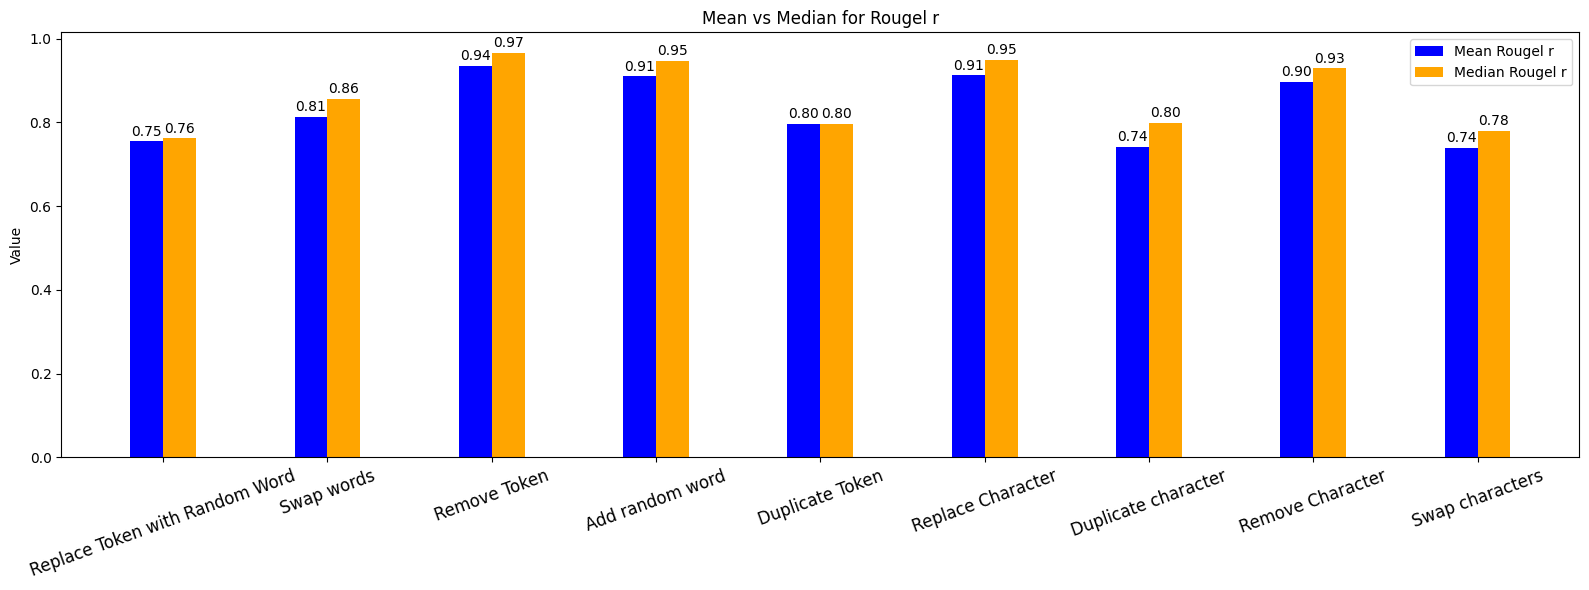

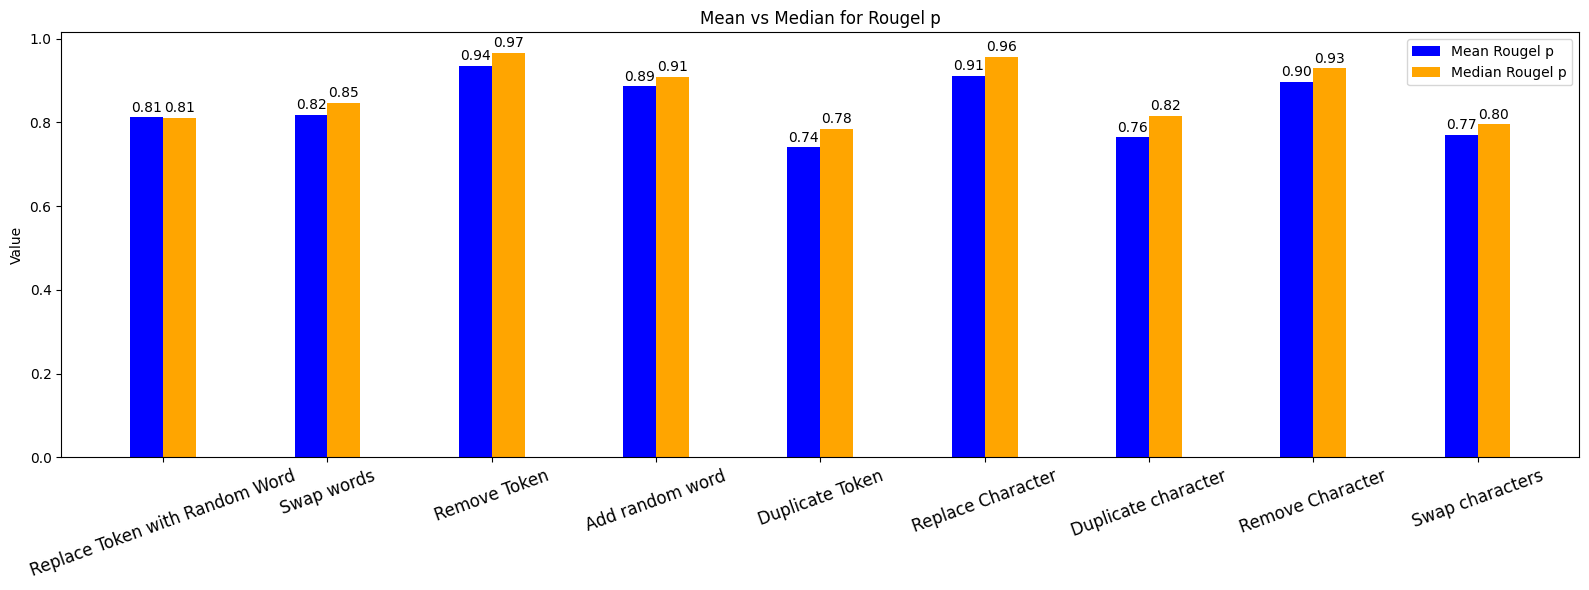

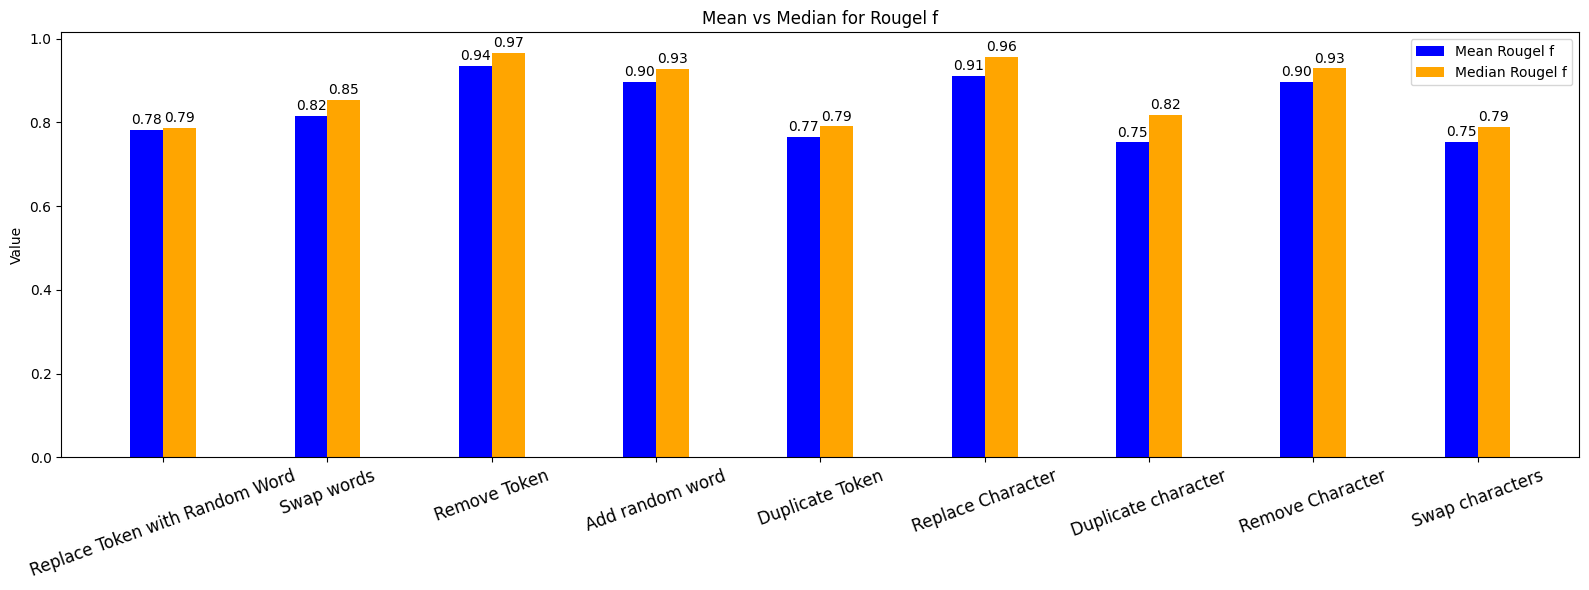

In [ ]:
tampering_types = df["tamperingType"].unique()

width = 0.2 
x = np.arange(len(tampering_types)) 

for column in columns_of_interest:
    fig, ax = plt.subplots(figsize=(16, 6))  

    mean_values = mean_by_strategy[column].values
    median_values = median_by_strategy[column].values

    bars1 = ax.bar(x - width/2, mean_values, width, label=f'Mean {column}', color='blue')

    bars2 = ax.bar(x + width/2, median_values, width, label=f'Median {column}', color='orange')

    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    for bar in bars2:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    ax.set_ylabel('Value')
    ax.set_title(f'Mean vs Median for {column}')
    ax.set_xticks(x)
    ax.set_xticklabels(tampering_types, rotation = 20, fontsize=12) 
    ax.legend()

    plt.tight_layout()  
    plt.show()


### Error bars using mean and std

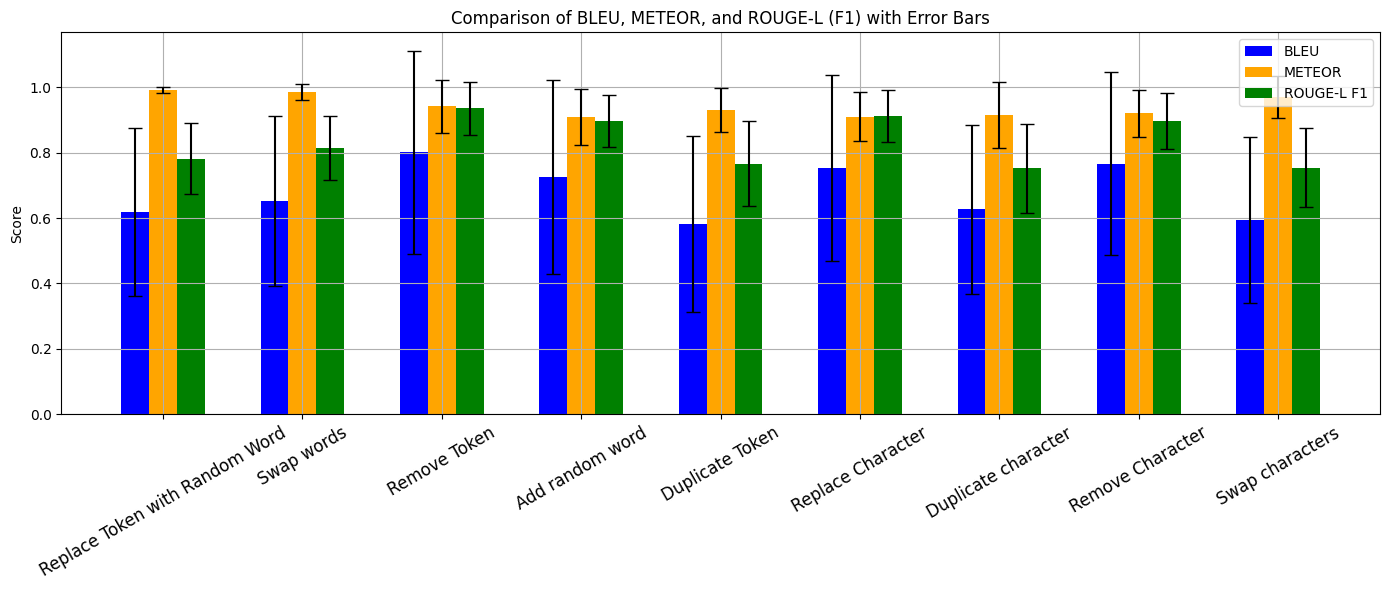

In [13]:
tampering_types = df["tamperingType"].unique()

bleu_mean = df.groupby("tamperingType")["BLEU"].mean()
meteor_mean = df.groupby("tamperingType")["METEOR"].mean()
rouge_mean = df.groupby("tamperingType")["Rougel f"].mean()  


bleu_std = df.groupby("tamperingType")["BLEU"].std()
meteor_std = df.groupby("tamperingType")["METEOR"].std()
rouge_std = df.groupby("tamperingType")["Rougel f"].std()


x = np.arange(len(tampering_types))  
width = 0.2  

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean, width, yerr=bleu_std, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean, width, yerr=meteor_std, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean, width, yerr=rouge_std, capsize=5, label="ROUGE-L F1", color="green")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, and ROUGE-L (F1) with Error Bars")
ax.set_xticks(x)
ax.set_xticklabels(tampering_types, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


### Error bars using mean and min/max

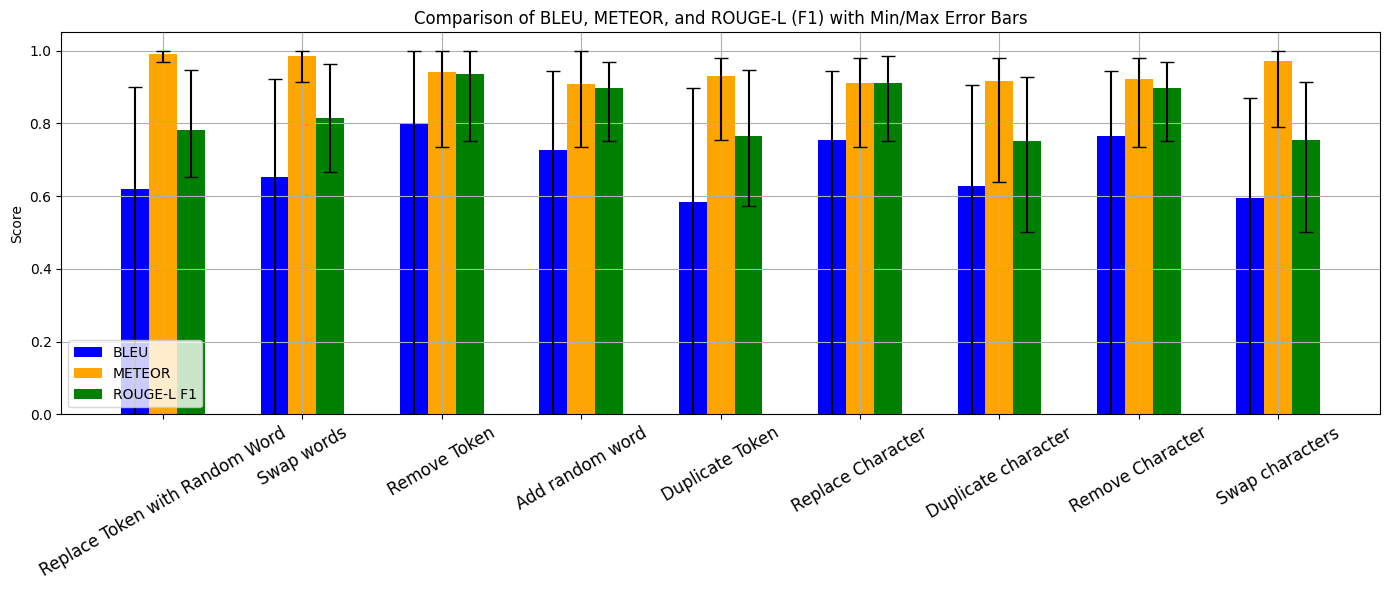

In [15]:
tampering_types = df["tamperingType"].unique()

bleu_mean = df.groupby("tamperingType")["BLEU"].mean()
meteor_mean = df.groupby("tamperingType")["METEOR"].mean()
rouge_mean = df.groupby("tamperingType")["Rougel f"].mean()

bleu_min = df.groupby("tamperingType")["BLEU"].min()
bleu_max = df.groupby("tamperingType")["BLEU"].max()

meteor_min = df.groupby("tamperingType")["METEOR"].min()
meteor_max = df.groupby("tamperingType")["METEOR"].max()

rouge_min = df.groupby("tamperingType")["Rougel f"].min()
rouge_max = df.groupby("tamperingType")["Rougel f"].max()

bleu_errors = [bleu_mean - bleu_min, bleu_max - bleu_mean]
meteor_errors = [meteor_mean - meteor_min, meteor_max - meteor_mean]
rouge_errors = [rouge_mean - rouge_min, rouge_max - rouge_mean]

x = np.arange(len(tampering_types))  
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean, width, yerr=bleu_errors, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean, width, yerr=meteor_errors, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean, width, yerr=rouge_errors, capsize=5, label="ROUGE-L F1", color="green")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, and ROUGE-L (F1) with Min/Max Error Bars")
ax.set_xticks(x)
ax.set_xticklabels(tampering_types, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()
